In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import time
from datetime import date

In [3]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [4]:
data.shape

(10910, 26)

In [5]:
data.rename(columns={'EmploymentStatus':'Employment Status'}, inplace=True)
data.rename(columns={'Unnamed:' ' 0':'unnamed:0'}, inplace=True)

columns = list(map(lambda x: x.strip('').lower().replace(' ','_'), data.columns))

#My first code with for loop
#columns=[]
#for i in range(len(data.columns)):
#    columns.append(data.columns[i].strip('').lower().replace(' ','_'))

#data.columns.lowercase()

data.columns = columns
data.tail()

,unnamed:0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A
10909,10909,IV32877,NaN,6857.519928,NaN,Basic,Bachelor,1/8/11,Unemployed,M,...,0.0,3,Personal Auto,Personal L1,Offer4,Web,1021.719397,SUV,Medsize,NaN


In [6]:
data_numerical= data._get_numeric_data()
data_numerical.columns

Index(['unnamed:0', 'customer_lifetime_value', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'total_claim_amount'],
      dtype='object')

In [7]:
data_categorical = [column for column in data.columns if data[column].dtype=="O"]
data_categorical

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employment_status',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type']

In [8]:
nullsdata= pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
nullsdata = nullsdata.rename(columns={'index':'header',0:'proportion_of_nulls'})
nullsdata

,proportion_of_nulls
unnamed:0,0.00
customer,0.00
state,5.78
customer_lifetime_value,0.00
response,5.78
coverage,0.00
education,0.00
effective_to_date,0.00
employment_status,0.00
gender,0.00


In [9]:
data.isna().all(axis=1).value_counts() # no full Null row.

False    10910
dtype: int64

In [10]:
data.drop(['vehicle_type'], axis = 1, inplace = True)  # There are a lot of null entries, so it makes sense just to remove it.

In [11]:
data['state']=data['state'].fillna('Unknown')

In [12]:
data['response']=data['response'].fillna('Unknown')

In [13]:
data['vehicle_class']=data['vehicle_class'].fillna('Unknown')

In [14]:
data['vehicle_size']=data['vehicle_size'].fillna('Unknown')

In [15]:
#data[(data['data['number_of_open_complaints'].isna()].isna() & data['months_since_last_claim'].isna()) == True]
# number of open complaints and months since last claim rows are Null at the same time.

comp_mean = data['number_of_open_complaints'].mean()
data['number_of_open_complaints']=data['number_of_open_complaints'].fillna(comp_mean)

month_mean = data['months_since_last_claim'].mean()
data['months_since_last_claim']=data['months_since_last_claim'].fillna(month_mean)

data.head()

,unnamed:0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,52,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,26,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,31,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,3,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,31,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize


In [16]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'],errors = 'coerce')

In [17]:
data['month'] = pd.DatetimeIndex(data['effective_to_date']).month

In [18]:
data['month'] = data['effective_to_date'].dt.strftime('%b')
data.head()

,unnamed:0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Feb
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Jan
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,Feb
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,Jan
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Jan


In [19]:
filtered = data.query("month == ['Jan', 'Feb', 'March']")

if filtered.shape == data.shape:  
    print('This data is just for the first quarter.')

This data is just for the first quarter.


In [20]:
# if it is necessary we can find means of all categorical values.
#means =[]
#for i in data_numerical.columns:
#    means.append(data[i].mean()

#or by using map

means = list(map(lambda x: data[x].mean(), data_numerical.columns))
print(means)

[5454.5, 8018.241093723163, 37536.28478460128, 93.19605866177818, 15.149070740488618, 48.09193400549954, 0.3842561058674663, 2.979193400549954, 434.88832970283863]


## Customer Analysis Round 3

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed:0                      10910 non-null  int64         
 1   customer                       10910 non-null  object        
 2   state                          10910 non-null  object        
 3   customer_lifetime_value        10910 non-null  float64       
 4   response                       10910 non-null  object        
 5   coverage                       10910 non-null  object        
 6   education                      10910 non-null  object        
 7   effective_to_date              10910 non-null  datetime64[ns]
 8   employment_status              10910 non-null  object        
 9   gender                         10910 non-null  object        
 10  income                         10910 non-null  int64         
 11  location_code  

In [22]:
data.describe()

,unnamed:0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,9.783520,27.940675,0.885589,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.384256,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


<AxesSubplot:>

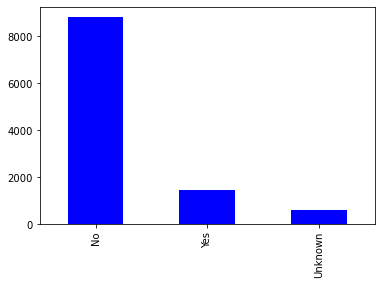

In [25]:
data['response'].value_counts().plot(kind='bar',color='blue')

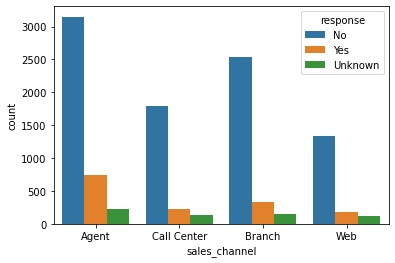

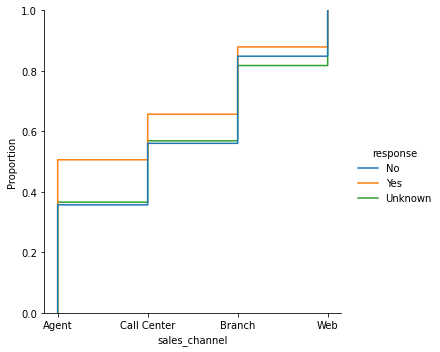

In [112]:
sns.countplot(x= 'sales_channel',hue='response',data=data)

sns.displot(x='sales_channel', data= data, hue='response', kind='ecdf')

<AxesSubplot:xlabel='total_claim_amount', ylabel='response'>

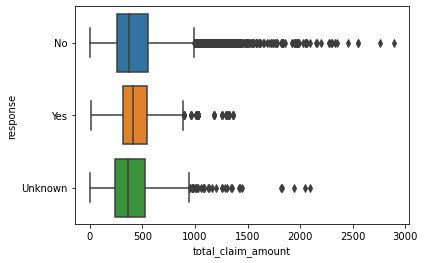

In [37]:
sns.boxplot(x="total_claim_amount", y="response", data=data)

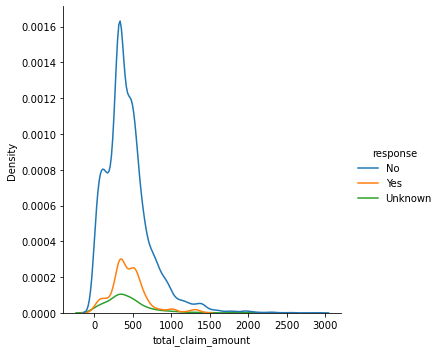

In [50]:
sns.displot(x='total_claim_amount', data= data, hue='response', kind='kde')

<AxesSubplot:xlabel='income', ylabel='response'>

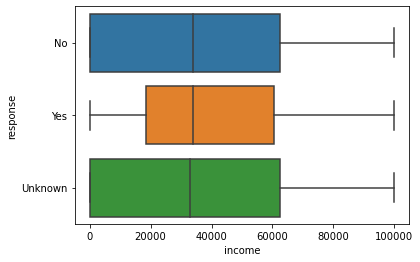

In [51]:
sns.boxplot(x="income", y="response", data=data)

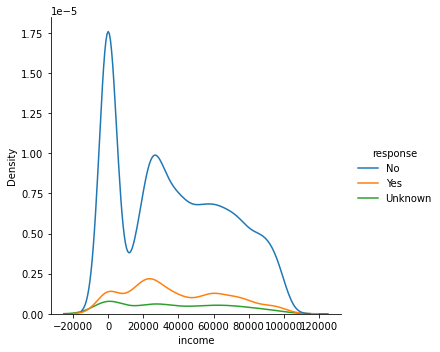

In [52]:
sns.displot(x='income', data= data, hue='response', kind='kde')

<Figure size 864x864 with 0 Axes>

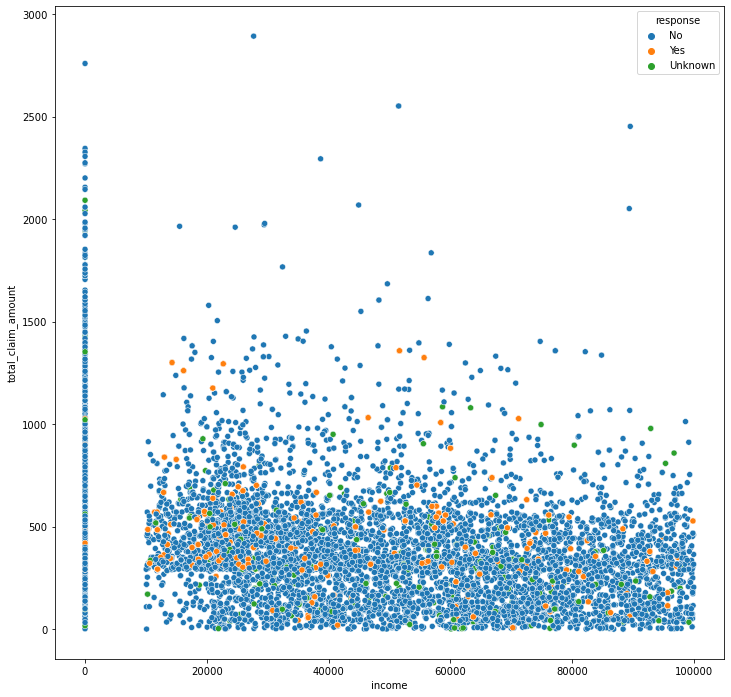

<Figure size 864x864 with 0 Axes>

In [116]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=data, x="income", y="total_claim_amount",hue='response')

## Customer Analysis Round 4

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed:0                      10910 non-null  int64         
 1   customer                       10910 non-null  object        
 2   state                          10910 non-null  object        
 3   customer_lifetime_value        10910 non-null  float64       
 4   response                       10910 non-null  object        
 5   coverage                       10910 non-null  object        
 6   education                      10910 non-null  object        
 7   effective_to_date              10910 non-null  datetime64[ns]
 8   employment_status              10910 non-null  object        
 9   gender                         10910 non-null  object        
 10  income                         10910 non-null  int64         
 11  location_code  

In [118]:
numerical = data._get_numeric_data()

In [119]:
data_categorical = [column for column in data.columns if data[column].dtype=="O"]

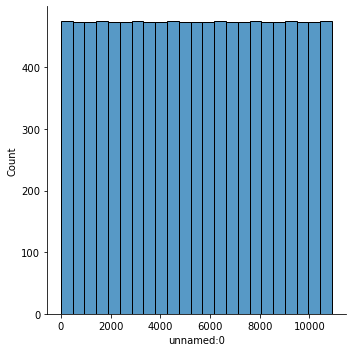

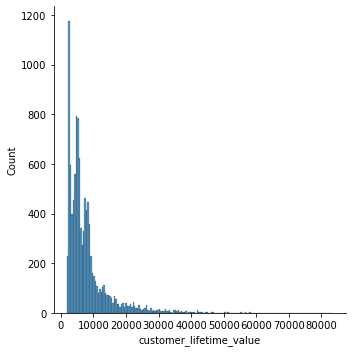

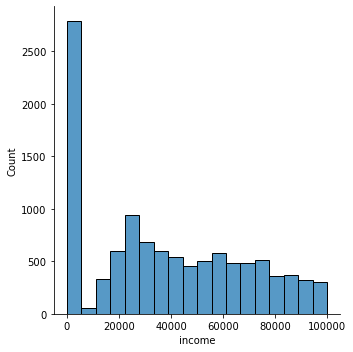

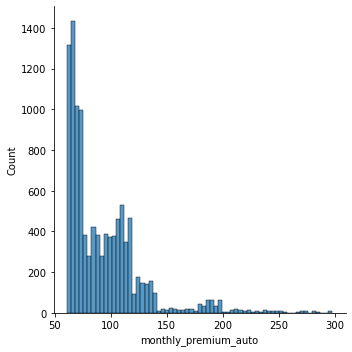

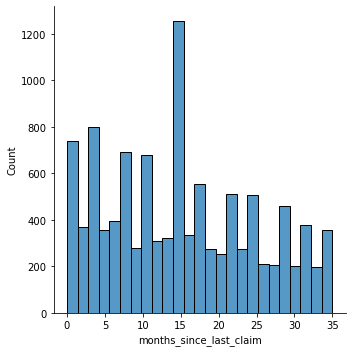

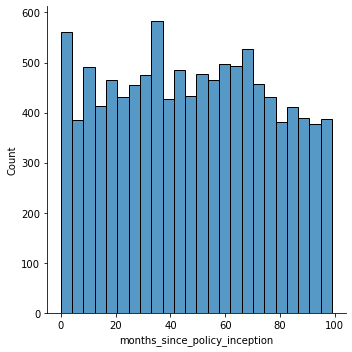

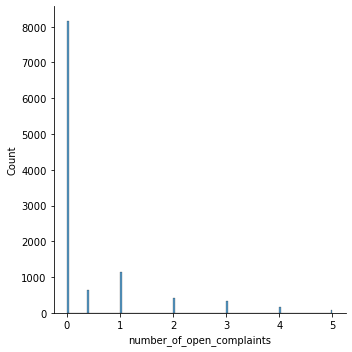

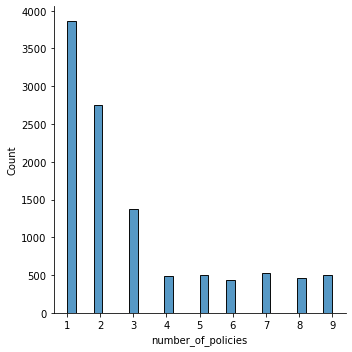

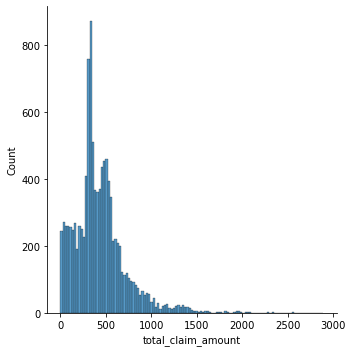

In [120]:
for x in numerical.columns:
    sns.displot(data,x = x)


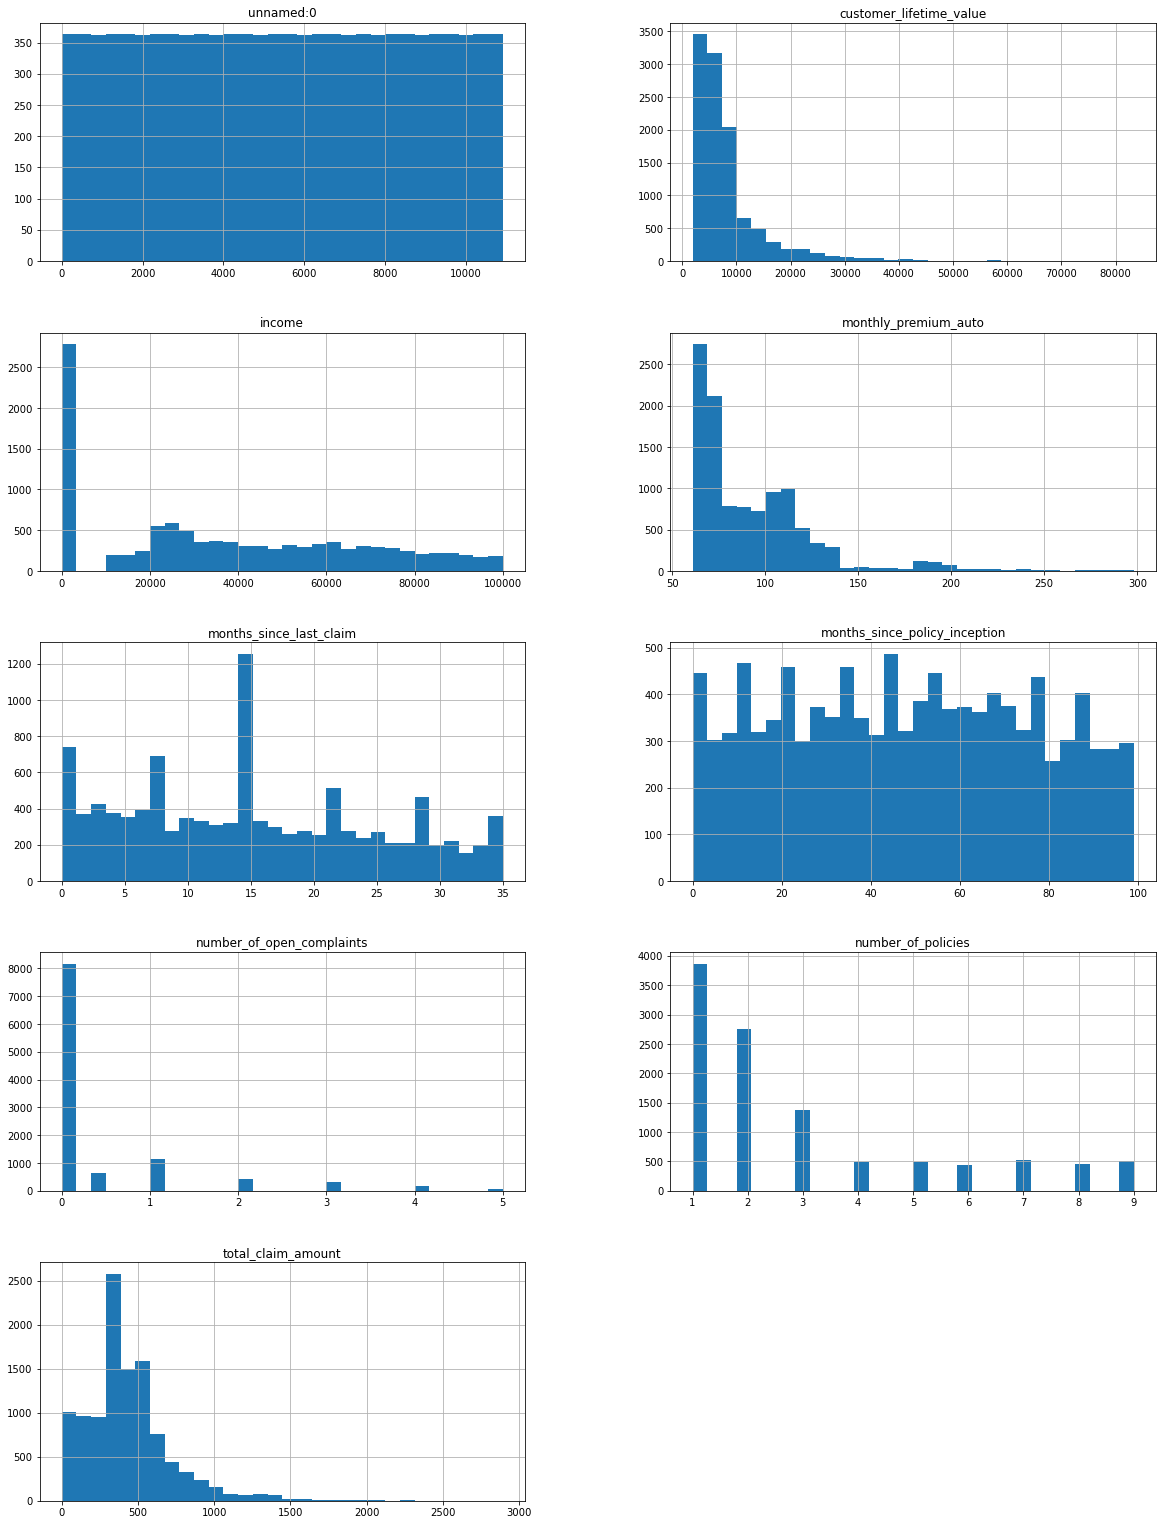

In [140]:
numerical.hist(bins=30, figsize=(20, 50), layout=(9, 2));

Do the distributions for different numerical variables look like a normal distribution? 
Answer : No, they don't.

In [132]:
corr_data = numerical
correlations_matrix = corr_data.corr()
correlations_matrix

,unnamed:0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
unnamed:0,1.000000,0.001355,0.008910,0.000863,0.007722,0.012795,0.007108,0.002319,-0.000593
customer_lifetime_value,0.001355,1.000000,0.028306,0.403069,0.015683,0.016960,-0.031501,0.016024,0.232626
income,0.008910,0.028306,1.000000,-0.009788,-0.023126,-0.005903,0.006956,-0.009960,-0.354141
monthly_premium_auto,0.000863,0.403069,-0.009788,1.000000,0.008504,0.018953,-0.010066,-0.020505,0.631799
months_since_last_claim,0.007722,0.015683,-0.023126,0.008504,1.000000,-0.038155,0.002246,0.007425,0.012728
months_since_policy_inception,0.012795,0.016960,-0.005903,0.018953,-0.038155,1.000000,0.004247,-0.009123,0.003095
number_of_open_complaints,0.007108,-0.031501,0.006956,-0.010066,0.002246,0.004247,1.000000,0.003964,-0.011025
number_of_policies,0.002319,0.016024,-0.009960,-0.020505,0.007425,-0.009123,0.003964,1.000000,-0.008923
total_claim_amount,-0.000593,0.232626,-0.354141,0.631799,0.012728,0.003095,-0.011025,-0.008923,1.000000


<AxesSubplot:>

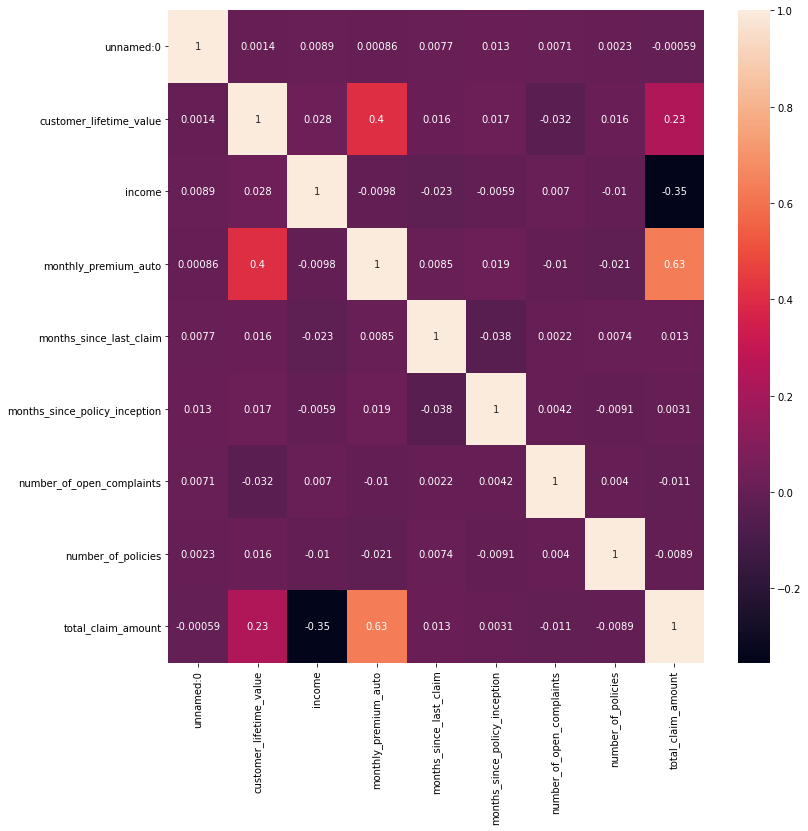

In [133]:
plt.figure(figsize=(12,12))
sns.heatmap(correlations_matrix,annot= True)